In [17]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy import stats
# from scipy.stats import shapiro, ktest,  poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("../DATA/df_clean_sin_duplicados.csv",index_col=0)

In [19]:
lista_hist = ["TOTALWORKINGYEARS","PERFORMANCERATING","DAILYRATE","YEARSATCOMPANY","MONTHLYRATE","MONTHLYINCOME","HOURLYRATE","DISTANCEFROMHOME","BUSINESSTRAVEL","DEPARTMENT","AGE","WORKLIFEBALANCE"]
lista_count = ["REMOTEWORK","YEARSWITHCURRMANAGER","YEARSSINCELASTPROMOTION","TRAININGTIMESLASTYEAR","STOCKOPTIONLEVEL","RELATIONSHIPSATISFACTION","PERCENTSALARYHIKE","OVERTIME","NUMCOMPANIESWORKED","MARITALSTATUS","JOBSATISFACTION","JOBROLE","JOBLEVEL","JOBINVOLVEMENT","GENDER","ENVIRONMENTSATISFACTION","EDUCATIONFIELD","EDUCATION","ATTRITION"]

In [20]:
def generar_graficas(list_hisplot, list_countplot):

    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
    axes = axes.flatten()

    for i, col in enumerate(list_hisplot):
        plt.sca(axes[i])   # Establece el eje actual
        plt.hist(df[col], 
                bins=10, 
                density=True, 
                color="steelblue", 
                edgecolor="black")
        
        plt.title(col)

    fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 40))
    axes = axes.flatten()

    for i, col in enumerate(list_countplot):
        plt.sca(axes[i])   # Establece el eje actual
        sns.countplot(x = col, 
                data = df, 
                color = "plum");
        
        plt.xticks(rotation = 45)
        plt.title(col)

    plt.tight_layout()

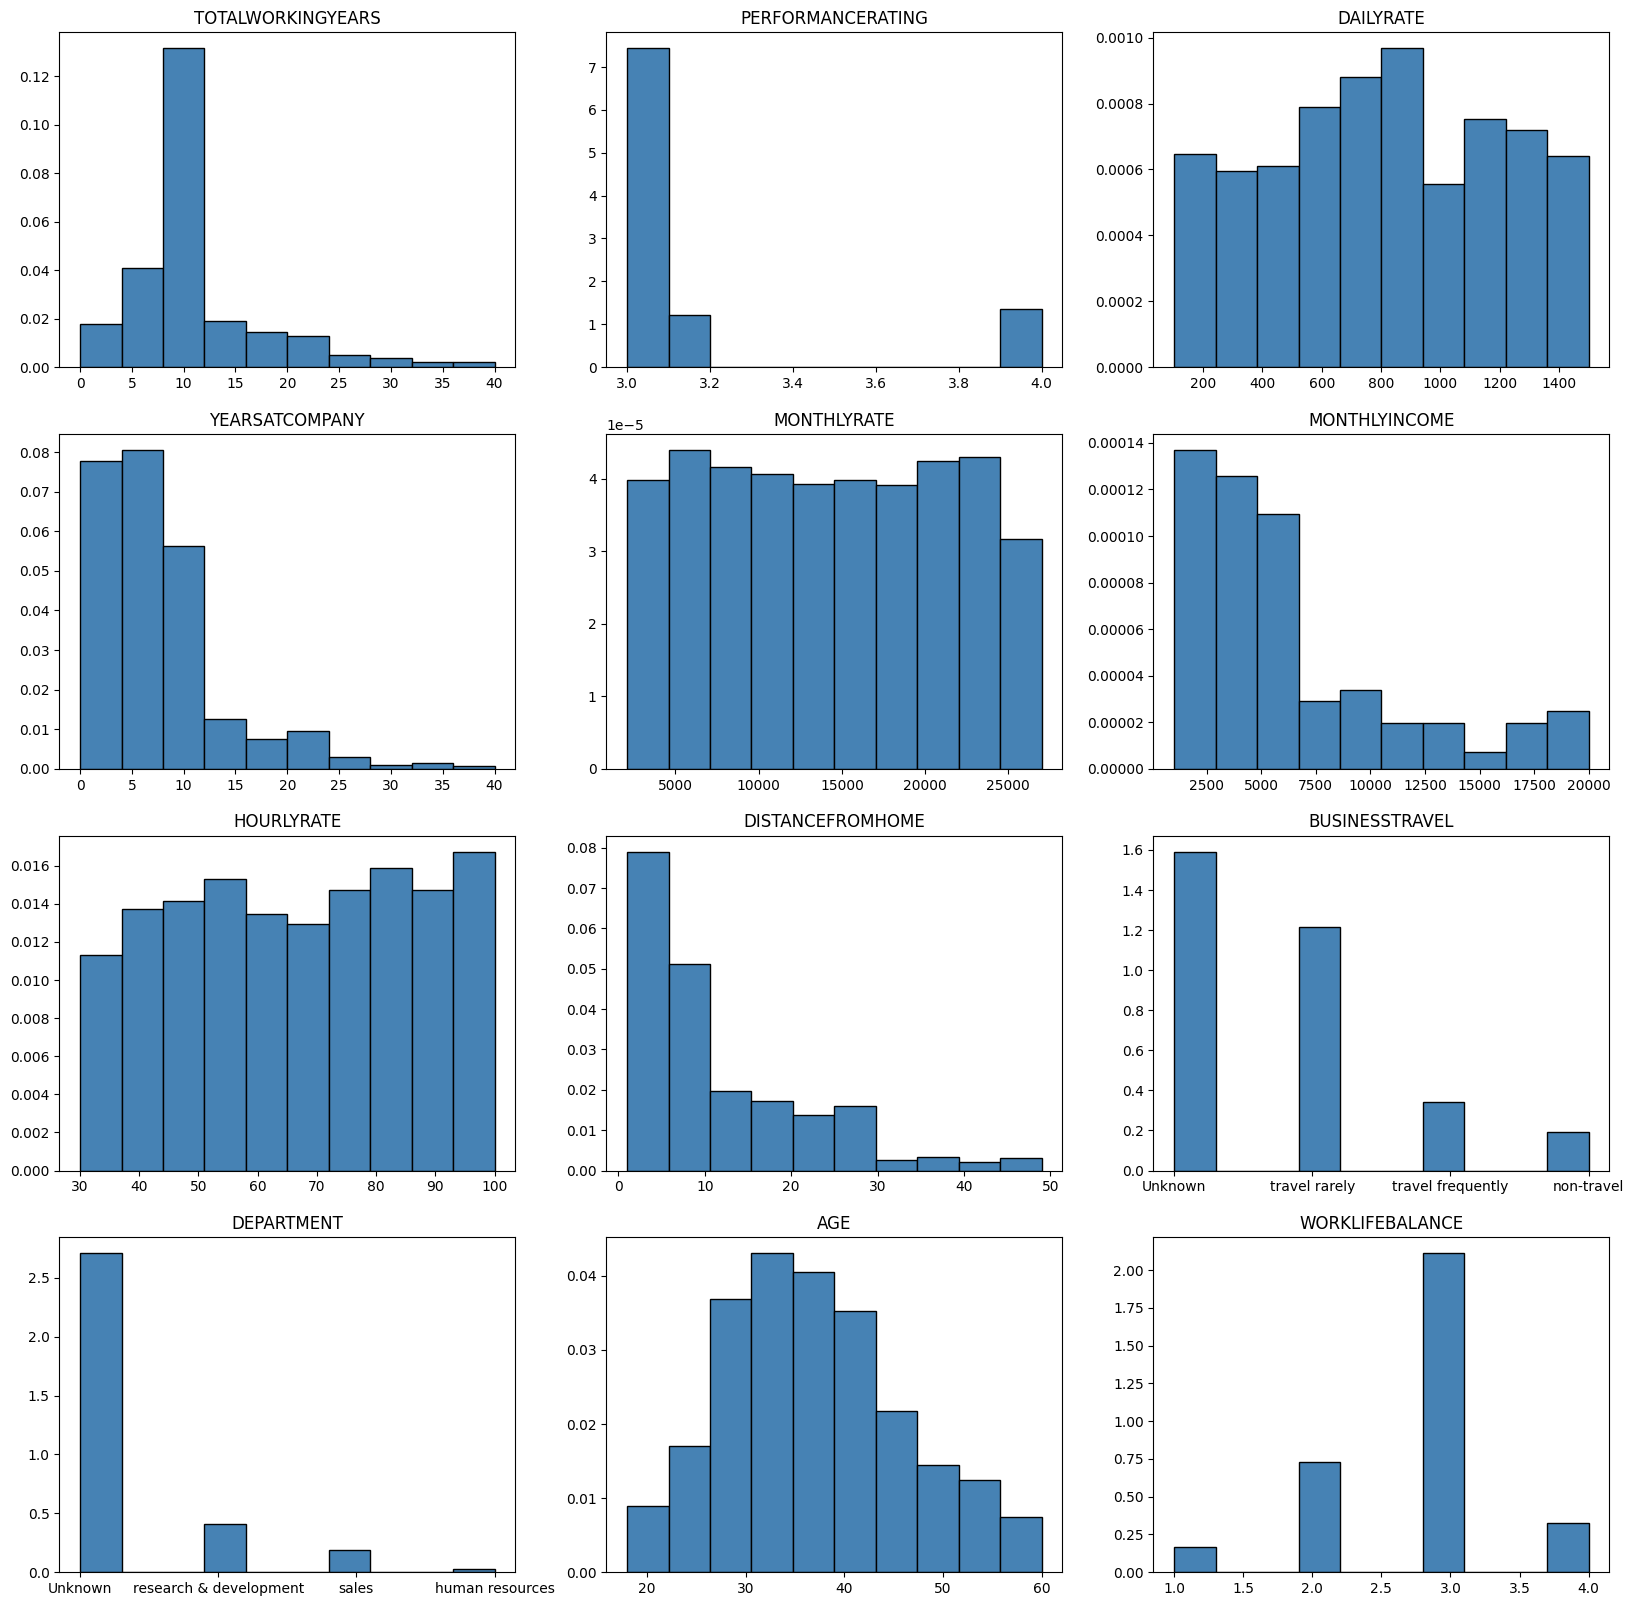

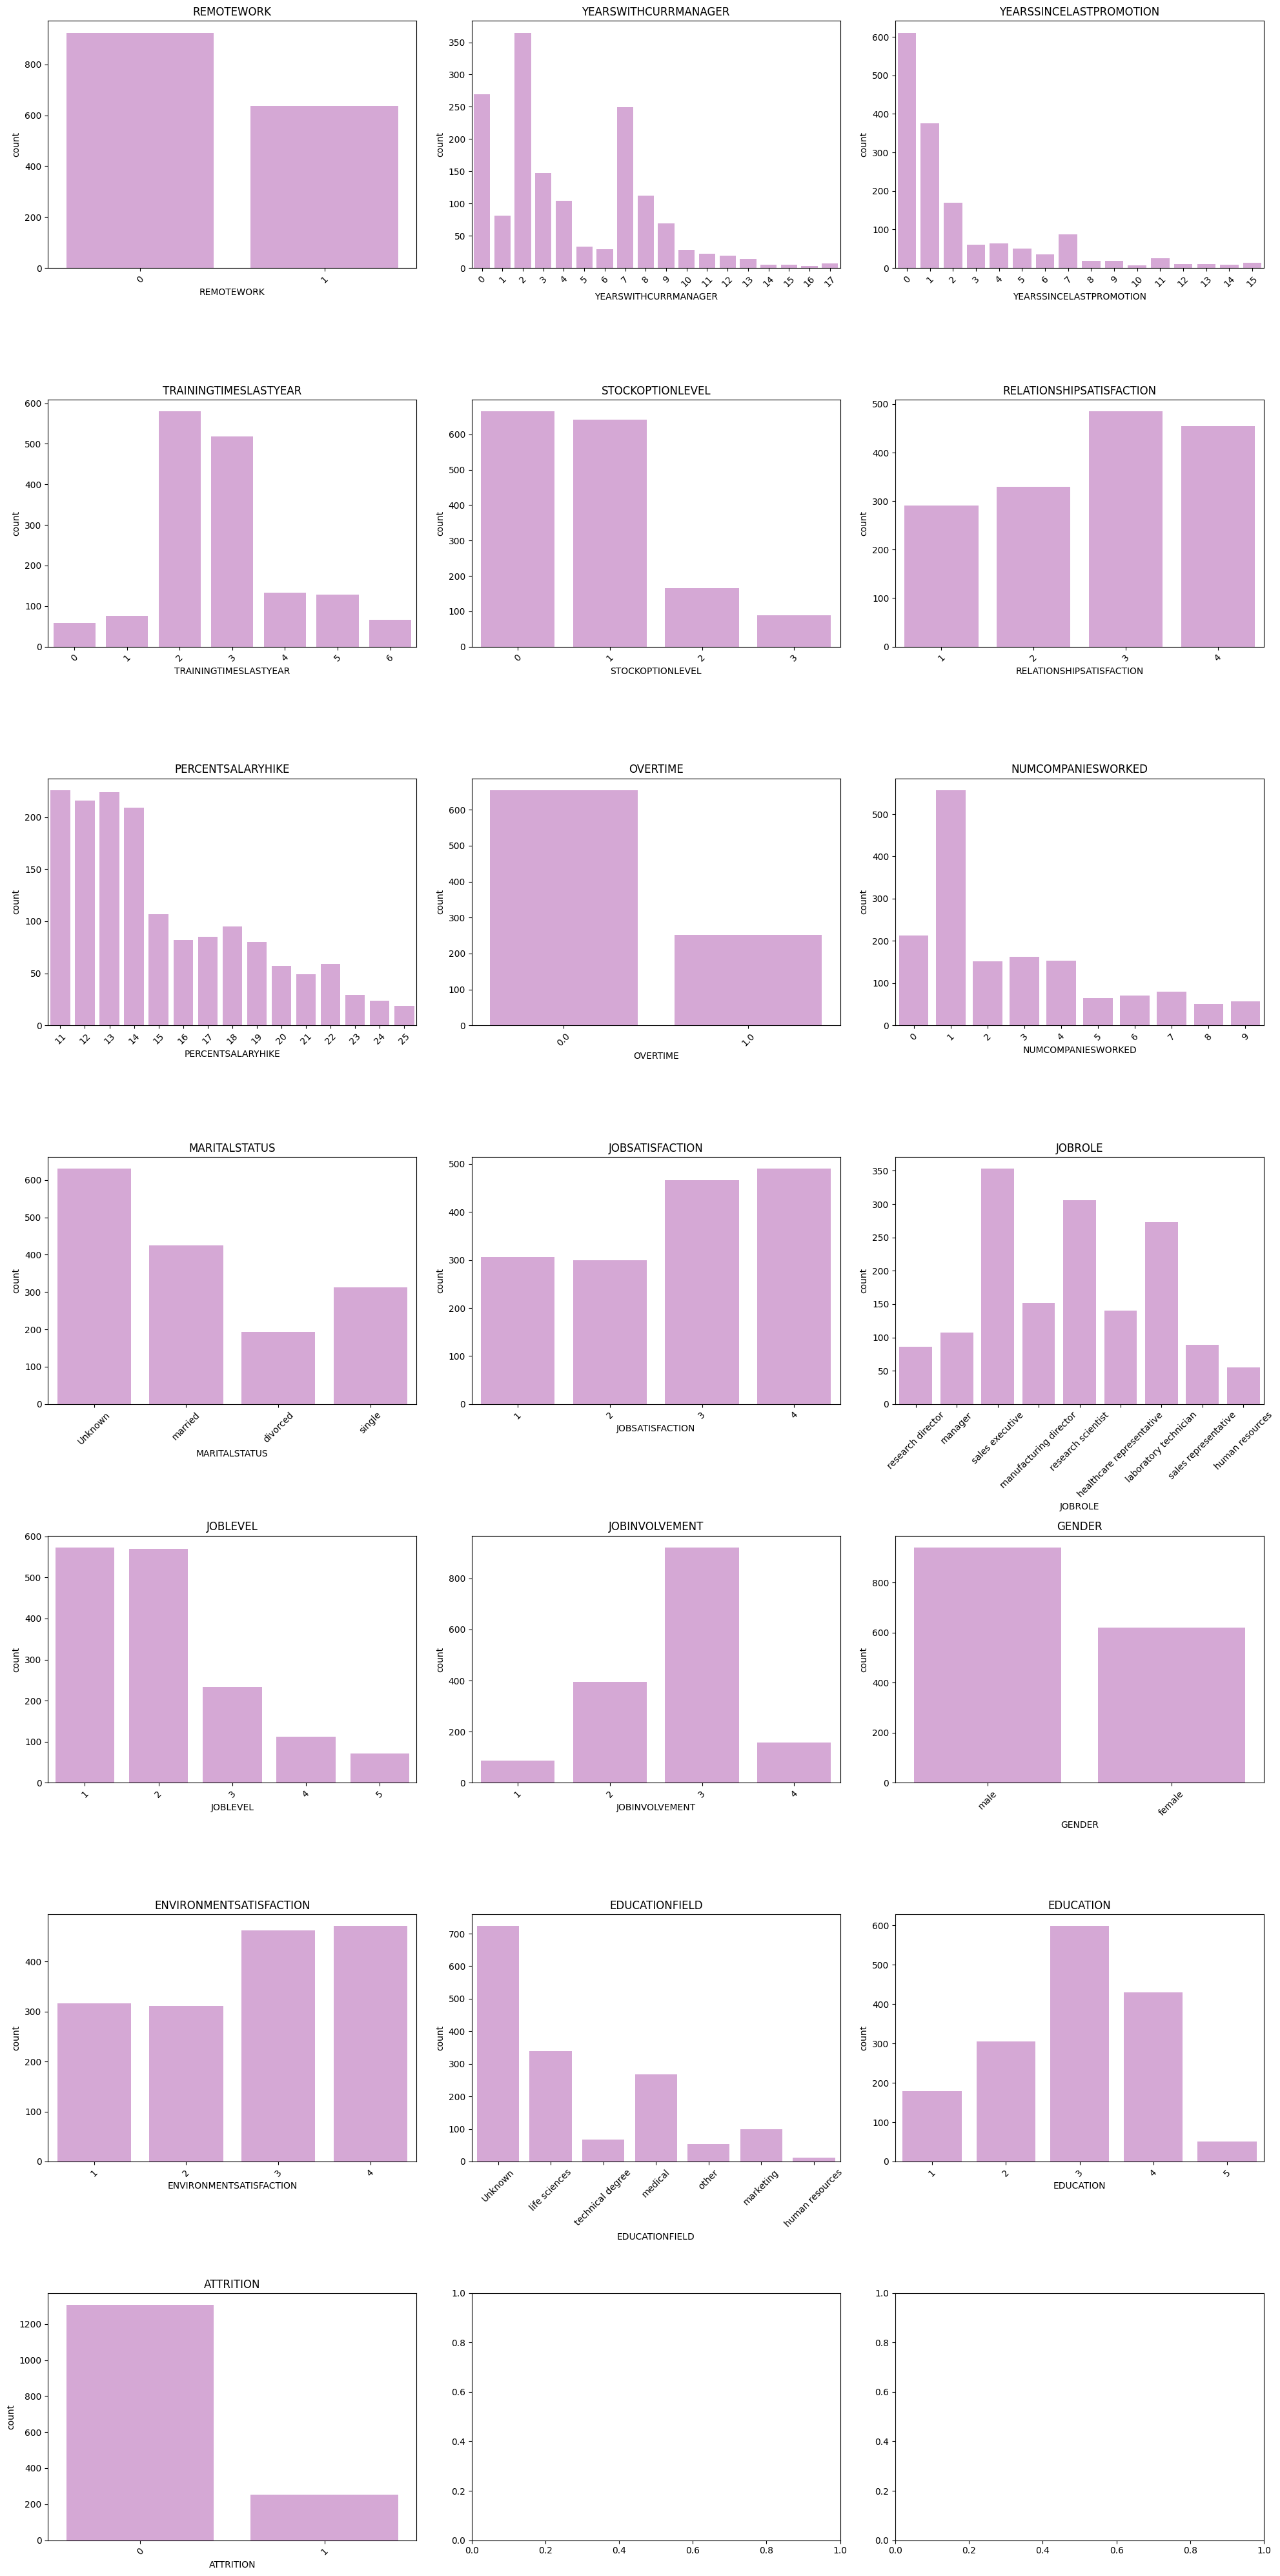

In [21]:
generar_graficas(lista_hist, lista_count)

In [22]:
df.head()

,AGE,ATTRITION,BUSINESSTRAVEL,DEPARTMENT,DISTANCEFROMHOME,EDUCATION,EDUCATIONFIELD,EMPLOYEENUMBER,ENVIRONMENTSATISFACTION,GENDER,HOURLYRATE,JOBINVOLVEMENT,JOBLEVEL,JOBROLE,JOBSATISFACTION,MARITALSTATUS,MONTHLYINCOME,MONTHLYRATE,NUMCOMPANIESWORKED,OVERTIME,PERCENTSALARYHIKE,RELATIONSHIPSATISFACTION,STOCKOPTIONLEVEL,TRAININGTIMESLASTYEAR,WORKLIFEBALANCE,YEARSATCOMPANY,YEARSSINCELASTPROMOTION,YEARSWITHCURRMANAGER,REMOTEWORK,DAILYRATE,PERFORMANCERATING,TOTALWORKINGYEARS
0,51.0,0,Unknown,Unknown,6,3,Unknown,162.0,1,male,51.0,3,5,research director,3,Unknown,19537.0,6462,7,0.0,13,3,0,5,3.0,20,15,15,1,684.0,3.0,11.223167
1,52.0,0,Unknown,Unknown,1,4,life sciences,259.0,3,male,65.0,2,5,manager,3,Unknown,19999.0,5678,0,NaN,14,1,1,5,3.0,33,11,9,1,699.0,3.0,34.000000
2,42.0,0,travel rarely,research & development,4,2,technical degree,319.0,3,male,58.0,3,5,manager,4,married,19232.0,4933,1,0.0,11,4,0,3,3.0,22,11,15,1,532.0,3.0,22.000000
3,47.0,0,travel rarely,Unknown,2,4,medical,Unknown,1,female,82.0,3,4,research director,3,married,17169.0,26703,3,NaN,19,2,2,2,3.0,20,5,6,0,359.0,3.0,10.971828
4,46.0,0,Unknown,Unknown,3,3,technical degree,Unknown,1,female,45.0,4,4,sales executive,1,divorced,NaN,7739,2,0.0,12,4,1,5,3.0,19,2,8,0,1319.0,3.0,11.714245


In [23]:
df.columns

Index(['AGE', 'ATTRITION', 'BUSINESSTRAVEL', 'DEPARTMENT', 'DISTANCEFROMHOME',
       'EDUCATION', 'EDUCATIONFIELD', 'EMPLOYEENUMBER',
       'ENVIRONMENTSATISFACTION', 'GENDER', 'HOURLYRATE', 'JOBINVOLVEMENT',
       'JOBLEVEL', 'JOBROLE', 'JOBSATISFACTION', 'MARITALSTATUS',
       'MONTHLYINCOME', 'MONTHLYRATE', 'NUMCOMPANIESWORKED', 'OVERTIME',
       'PERCENTSALARYHIKE', 'RELATIONSHIPSATISFACTION', 'STOCKOPTIONLEVEL',
       'TRAININGTIMESLASTYEAR', 'WORKLIFEBALANCE', 'YEARSATCOMPANY',
       'YEARSSINCELASTPROMOTION', 'YEARSWITHCURRMANAGER', 'REMOTEWORK',
       'DAILYRATE', 'PERFORMANCERATING', 'TOTALWORKINGYEARS'],
      dtype='object')

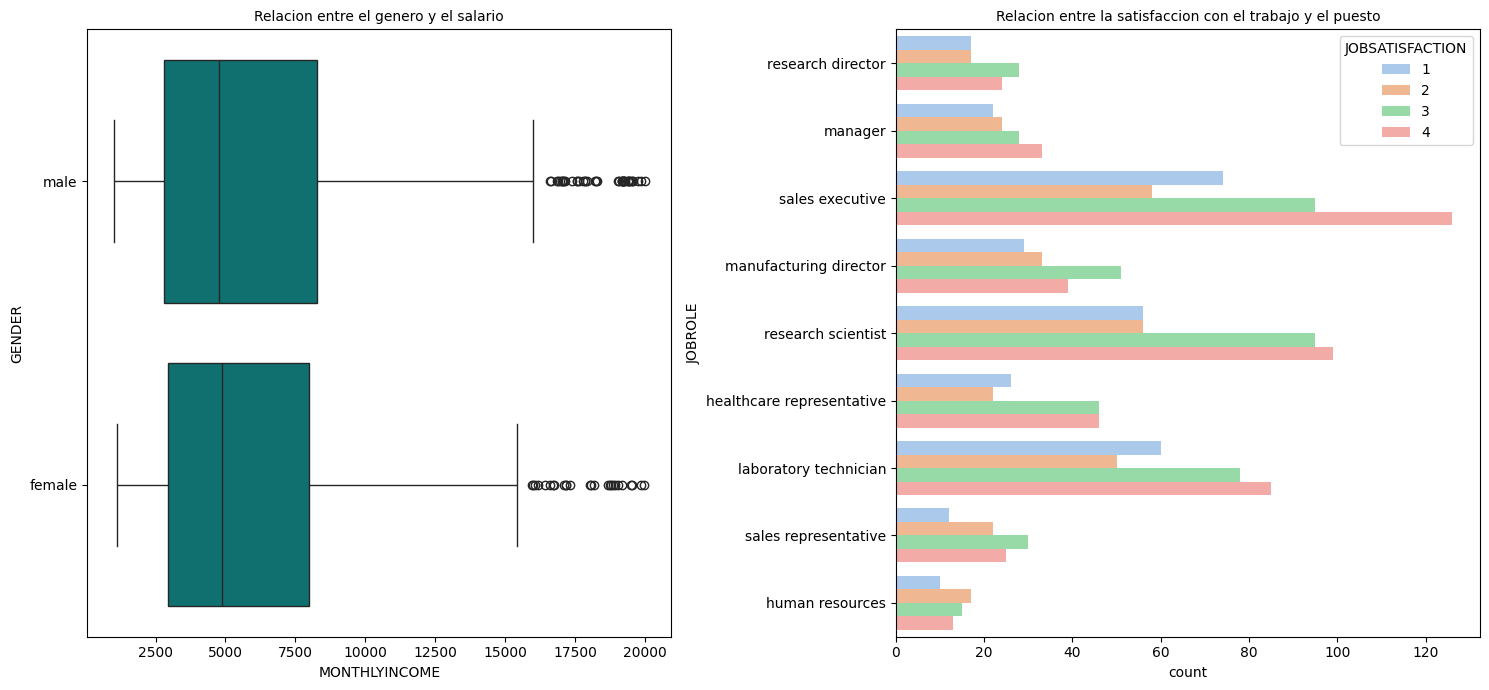

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(y = "GENDER", x = "MONTHLYINCOME", data = df, color = "teal", ax = axes[0])
axes[0].set_title("Relacion entre el genero y el salario", fontsize = 10)

sns.countplot(hue = "JOBSATISFACTION", y = "JOBROLE", data = df, palette= "pastel", ax = axes[1])
axes[1].set_title("Relacion entre la satisfaccion con el trabajo y el puesto", fontsize = 10)

fig.tight_layout();

In [25]:
df["EDUCATION"].isnull().sum()

0

In [26]:
df["PERFORMANCERATING"].dtype

dtype('float64')

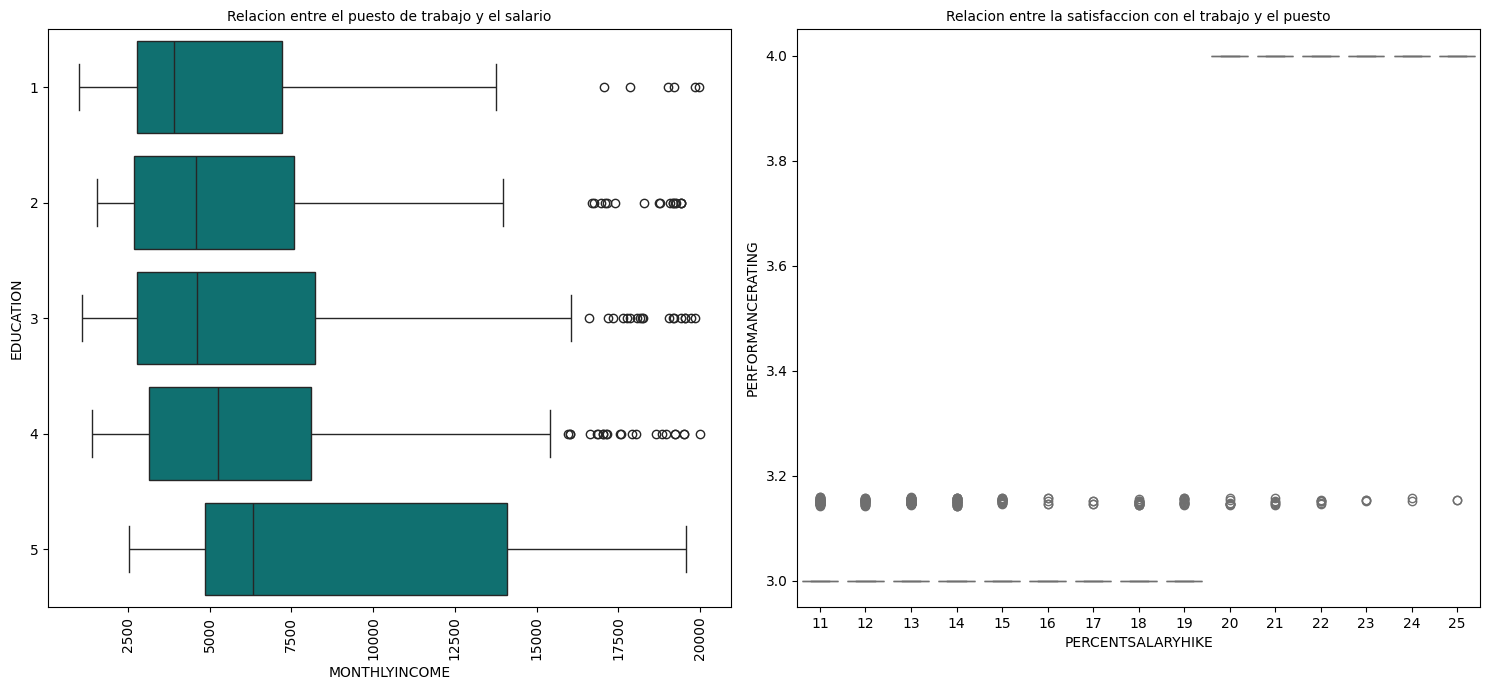

In [27]:
df_str = df.copy()

df_str["EDUCATION"] = df_str["EDUCATION"].apply(lambda x: str(x))
df_str["EDUCATION_num"] = df_str["EDUCATION"].astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(y = "EDUCATION", x = "MONTHLYINCOME", data = df_str.sort_values(by='EDUCATION_num'), color = "teal", ax = axes[0])
axes[0].set_title("Relacion entre el puesto de trabajo y el salario", fontsize = 10)

sns.boxplot(x = "PERCENTSALARYHIKE", y = "PERFORMANCERATING", data = df, palette= "pastel", ax = axes[1])
axes[1].set_title("Relacion entre la satisfaccion con el trabajo y el puesto", fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

fig.tight_layout();

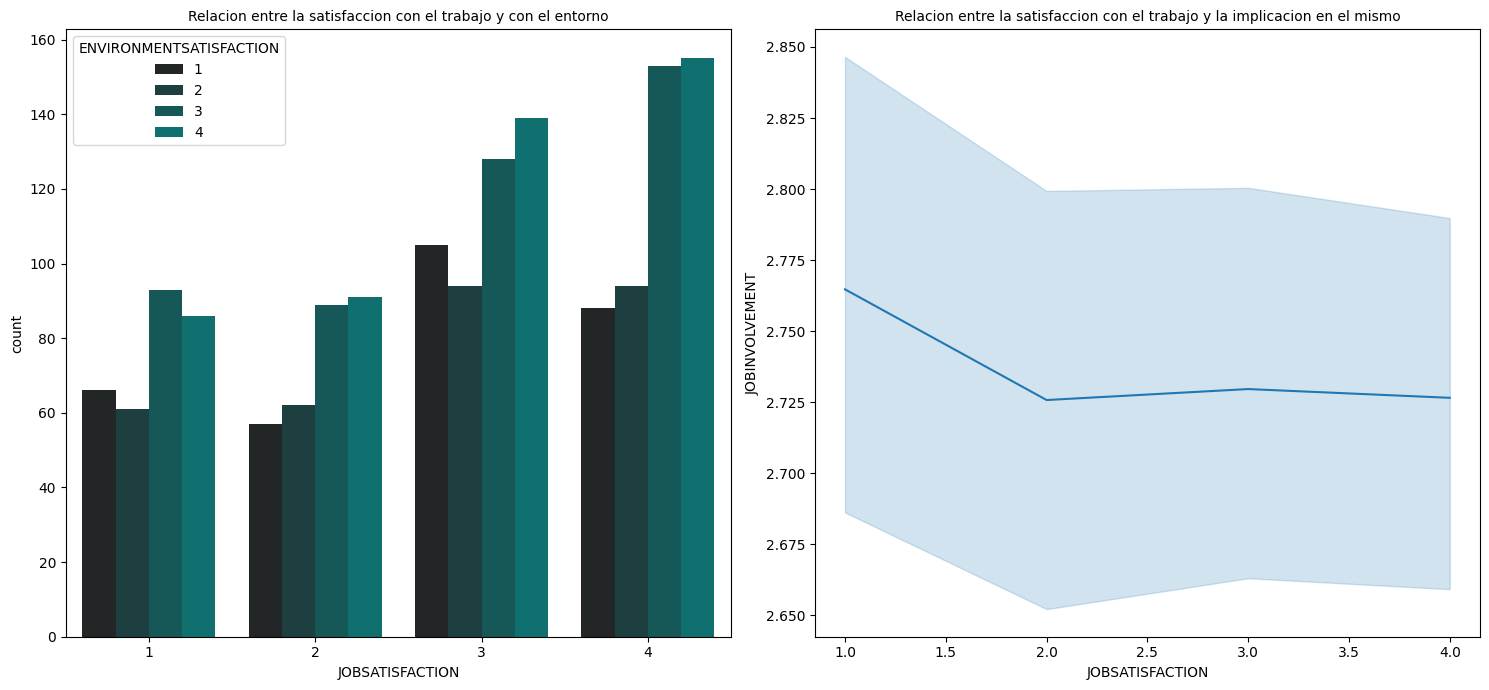

In [28]:
## como se relaciona job satisfaction con enviroment satisfaction y job envolvement

fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x = "JOBSATISFACTION", hue = "ENVIRONMENTSATISFACTION", data = df, color = "teal", ax = axes[0])

axes[0].set_xlabel("JOBSATISFACTION")
axes[0].set_title("Relacion entre la satisfaccion con el trabajo y con el entorno", fontsize = 10)

sns.lineplot(x = "JOBSATISFACTION", y = "JOBINVOLVEMENT", data = df, palette= "pastel", ax = axes[1])

axes[1].set_xlabel("JOBSATISFACTION")
axes[1].set_ylabel("JOBINVOLVEMENT")
axes[1].set_title("Relacion entre la satisfaccion con el trabajo y la implicacion en el mismo", fontsize = 10)

fig.tight_layout();

In [29]:
## grafico 1:
# a grandes rasgos la tendencia en los 4 niveles de satisfaccion laboral son muy parecidos, la mayoria de empleados estan en los niveles mas altos de satisfaccion
# llama la atencion que en el nivel 3 de satisfaccion laboral, muchos empleados no estan satisfechos con el entorno

## grafico 2:
# el mayor grado de implicacion con el trabajo se da cuando el empleado esta poco satisfecho, [[[[esto no tiene mucho sentido]]]]

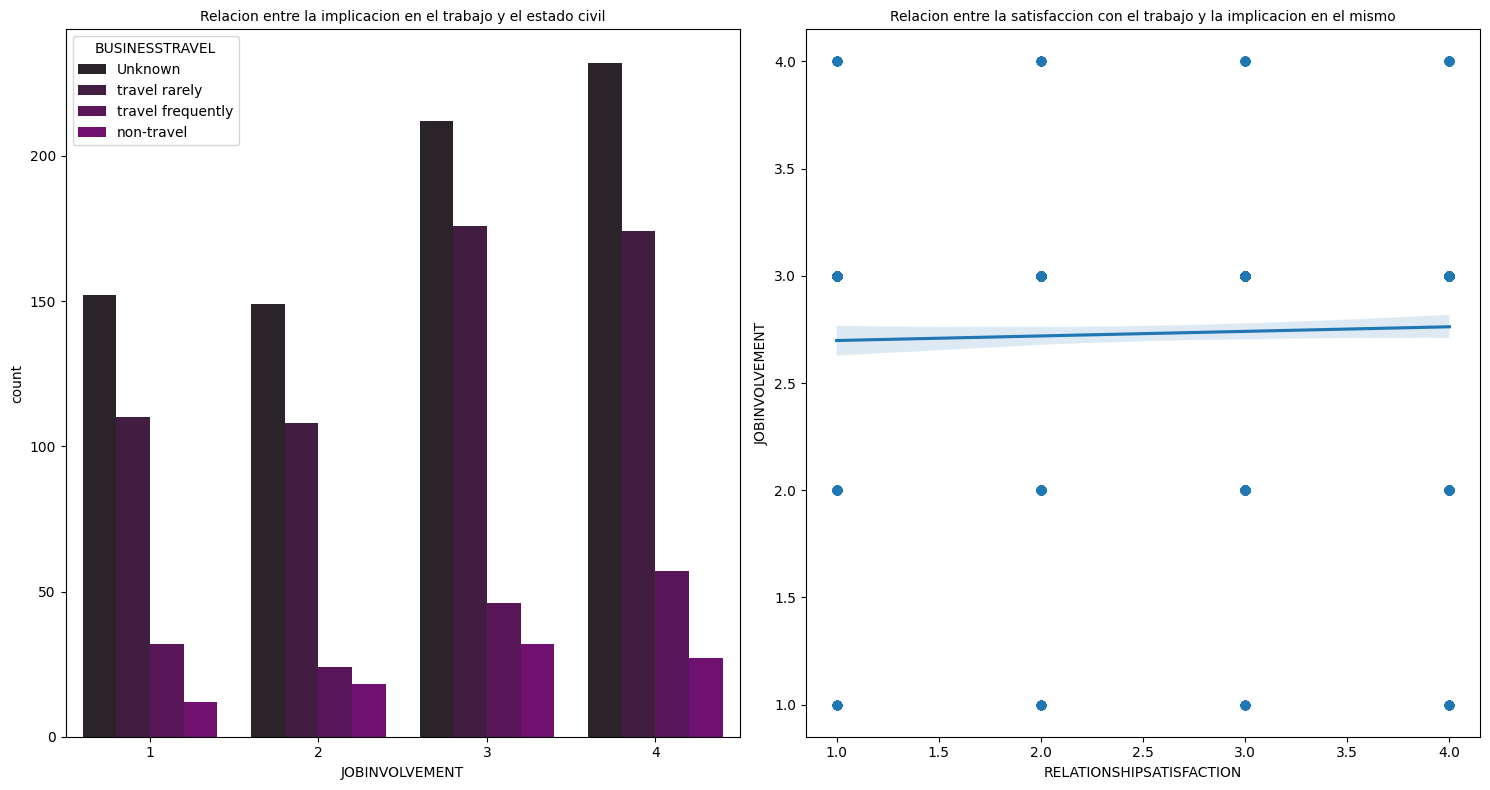

In [30]:
#relacion entre jobinvolvement con marital status y relationship

fig, axes = plt.subplots(1, 2, figsize=(15,8))
sns.countplot(x = "JOBSATISFACTION", hue = "BUSINESSTRAVEL", data = df, color = "purple", ax = axes[0])
axes[0].set_xlabel("JOBINVOLVEMENT")

axes[0].set_title("Relacion entre la implicacion en el trabajo y el estado civil", fontsize = 10)




sns.regplot(x = "RELATIONSHIPSATISFACTION", y = "JOBINVOLVEMENT", data = df, ax = axes[1])

axes[1].set_xlabel("RELATIONSHIPSATISFACTION")
axes[1].set_ylabel("JOBINVOLVEMENT")
axes[1].set_title("Relacion entre la satisfaccion con el trabajo y la implicacion en el mismo", fontsize = 10)

fig.tight_layout(); 

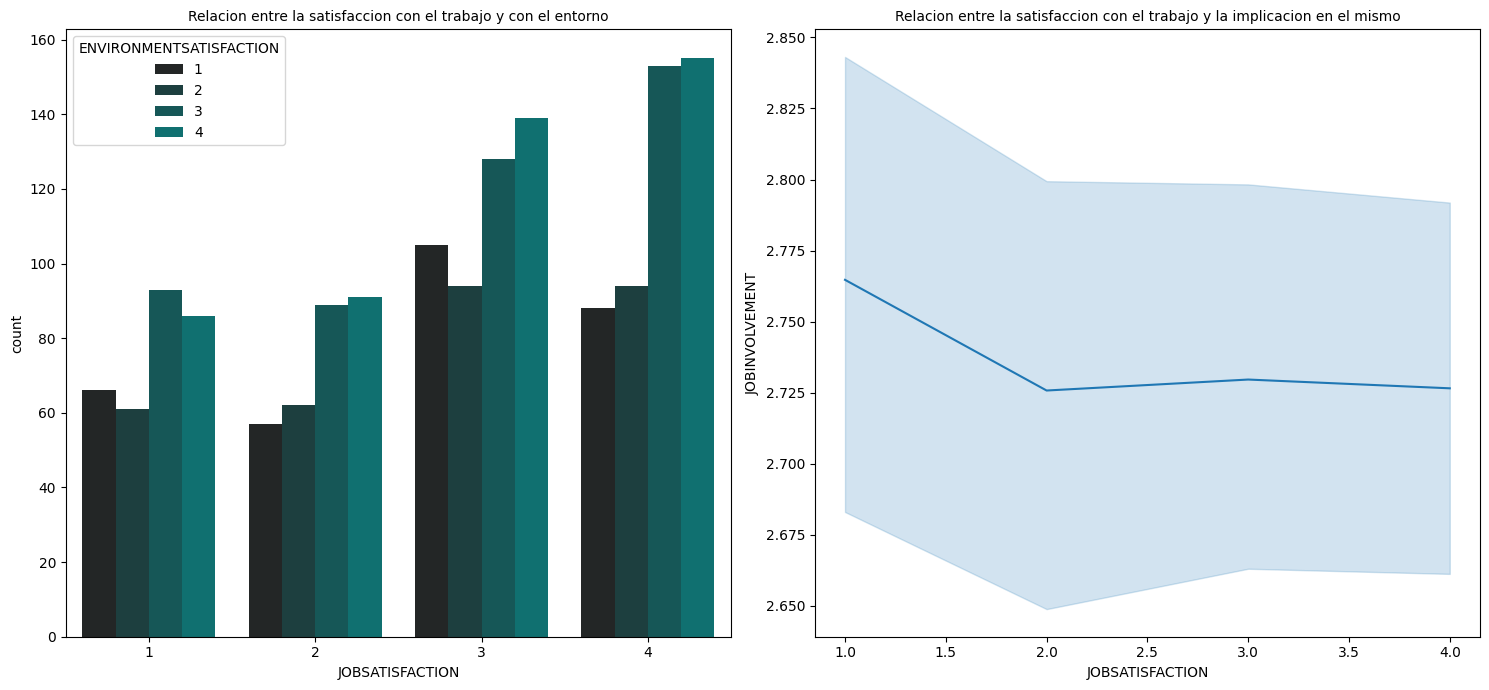

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x = "JOBSATISFACTION", hue = "ENVIRONMENTSATISFACTION", data = df, color = "teal", ax = axes[0])

axes[0].set_xlabel("JOBSATISFACTION")
axes[0].set_title("Relacion entre la satisfaccion con el trabajo y con el entorno", fontsize = 10)

sns.lineplot(x = "JOBSATISFACTION", y = "JOBINVOLVEMENT", data = df, palette= "pastel", ax = axes[1])

axes[1].set_xlabel("JOBSATISFACTION")
axes[1].set_ylabel("JOBINVOLVEMENT")
axes[1].set_title("Relacion entre la satisfaccion con el trabajo y la implicacion en el mismo", fontsize = 10)

fig.tight_layout();

In [32]:
## grafico 1:
# a grandes rasgos los datos en los 4 niveles de satisfaccion laboral son muy parecidos, aunque la mayoria de empleados estan en el nivel 3 de implicacion
# llama la atencion que en el nivel 3 de satisfaccion laboral, muchos empleados no estan satisfechos con el entorno

## grafico 2:
# [[[[REVISAR]]]]

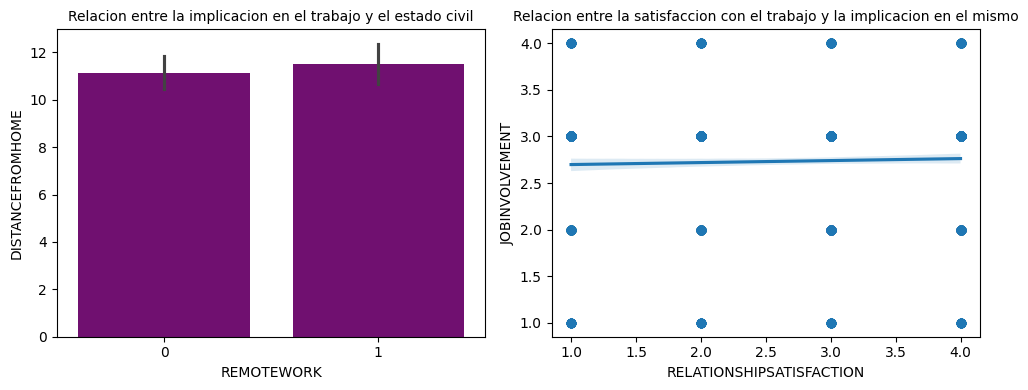

In [33]:
#relacion entre jobinvolvement con marital status y relationship

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.barplot(x = "REMOTEWORK", y = "DISTANCEFROMHOME", data = df, color = "purple", ax = axes[0])


axes[0].set_title("Relacion entre la implicacion en el trabajo y el estado civil", fontsize = 10)

sns.regplot(x = "RELATIONSHIPSATISFACTION", y = "JOBINVOLVEMENT", data = df, ax = axes[1])

axes[1].set_xlabel("RELATIONSHIPSATISFACTION")
axes[1].set_ylabel("JOBINVOLVEMENT")
axes[1].set_title("Relacion entre la satisfaccion con el trabajo y la implicacion en el mismo", fontsize = 10)

fig.tight_layout(); 